# Importing the dataset

In [ ]:
#trained dataset (Sentiment Analysis done in DataSplit.ipynb)

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 10000)

HotelReview = pd.read_csv("/content/drive/MyDrive/V2/Hotel_Cleaned.csv")
print (len(HotelReview.index))
print(HotelReview.info())
print(HotelReview.head(5))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
151319
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151319 entries, 0 to 151318
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Hotel               151319 non-null  object 
 1   Titles              151319 non-null  object 
 2   Reviews             151319 non-null  object 
 3   Dates               151319 non-null  object 
 4   Review_Rating       151319 non-null  int64  
 5   Travel_Type         151319 non-null  object 
 6   Hotel_Class         151319 non-null  float64
 7   No_of_Reviews       151319 non-null  int64  
 8   Rating              151319 non-null  float64
 9   Location            151319 non-null  float64
 10  Cleanliness         151319 non-null  float64
 11  Service             151319 non-null  float64
 12  Value               151319 non-null  float64
 13

In [ ]:
#total no. of hotels
len(HotelReview['Hotel'].unique())

268

In [ ]:
#total no. of Reviews
len(HotelReview['Reviews'])


151319

In [ ]:
HotelReview[['Hotel','Titles', 'Reviews', 'Address']] = HotelReview[['Hotel','Titles', 'Reviews', 'Address']].astype("string")
HotelReview[['Review_Rating','Travel_Type', 'Hotel_Class', 'Rating','Location','Cleanliness','Service','Value','FreeParking','FreeWifi','FreeBreakfast','Gym','Pool','Restaurant','BarLounge','TV','EventFacilities','RoomService','Sentiment']] = HotelReview[['Review_Rating','Travel_Type', 'Hotel_Class', 'Rating','Location','Cleanliness','Service','Value','FreeParking','FreeWifi','FreeBreakfast','Gym','Pool','Restaurant','BarLounge','TV','EventFacilities','RoomService','Sentiment']].astype("category")
HotelReview[['No_of_Reviews', 'Year']] = HotelReview[['No_of_Reviews', 'Year']].astype("int")
print(HotelReview.dtypes)


Hotel                   string
Titles                  string
Reviews                 string
Dates                   object
Review_Rating         category
Travel_Type           category
Hotel_Class           category
No_of_Reviews            int64
Rating                category
Location              category
Cleanliness           category
Service               category
Value                 category
Address                 string
FreeParking           category
FreeWifi              category
FreeBreakfast         category
Gym                   category
Pool                  category
Restaurant            category
BarLounge             category
TV                    category
EventFacilities       category
RoomService           category
Year                     int64
Reviews_WordCount        int64
Sentiment_Pos          float64
Sentiment_Neg          float64
Sentiment_Neu          float64
Sentiment_Compound     float64
Sentiment             category
dtype: object


In [ ]:
for col in HotelReview.columns.drop(['Hotel','Titles','Reviews','Dates','No_of_Reviews','Address','Reviews_WordCount','Sentiment_Pos','Sentiment_Neg','Sentiment_Neu','Sentiment_Compound']):
    print('-' * 40 + col + '-' * 40 )
    display(HotelReview[col].value_counts(dropna=False).sort_index(ascending=True).head(10))


----------------------------------------Review_Rating----------------------------------------


1     7070
2     6950
3    19273
4    43130
5    74896
Name: Review_Rating, dtype: int64

----------------------------------------Travel_Type----------------------------------------


Others      26822
business    23940
couple      42337
family      32646
friends     13331
solo        12243
Name: Travel_Type, dtype: int64

----------------------------------------Hotel_Class----------------------------------------


1.0      389
1.5       69
2.0    13534
2.5      942
3.0    33167
3.5     2995
4.0    55083
4.5     1700
5.0    43440
Name: Hotel_Class, dtype: int64

----------------------------------------Rating----------------------------------------


2.0      356
2.5      639
3.0     7289
3.5    30246
4.0    50954
4.5    59245
5.0     2590
Name: Rating, dtype: int64

----------------------------------------Location----------------------------------------


2.5       38
3.0     2376
3.5    17314
4.0    32407
4.5    80598
5.0    18586
Name: Location, dtype: int64

----------------------------------------Cleanliness----------------------------------------


1.0        4
2.0      352
2.5     1090
3.0     3746
3.5    13057
4.0    42440
4.5    78036
5.0    12594
Name: Cleanliness, dtype: int64

----------------------------------------Service----------------------------------------


2.5     1217
3.0     4458
3.5    21073
4.0    50541
4.5    71630
5.0     2400
Name: Service, dtype: int64

----------------------------------------Value----------------------------------------


2.0      503
2.5      657
3.0     6570
3.5    32322
4.0    93949
4.5    17314
5.0        4
Name: Value, dtype: int64

----------------------------------------FreeParking----------------------------------------


0.0    111308
1.0     40011
Name: FreeParking, dtype: int64

----------------------------------------FreeWifi----------------------------------------


0.0     15600
1.0    135719
Name: FreeWifi, dtype: int64

----------------------------------------FreeBreakfast----------------------------------------


0.0    132667
1.0     18652
Name: FreeBreakfast, dtype: int64

----------------------------------------Gym----------------------------------------


0.0     44601
1.0    106718
Name: Gym, dtype: int64

----------------------------------------Pool----------------------------------------


0.0     44754
1.0    106565
Name: Pool, dtype: int64

----------------------------------------Restaurant----------------------------------------


0.0     33764
1.0    117555
Name: Restaurant, dtype: int64

----------------------------------------BarLounge----------------------------------------


0.0    61181
1.0    90138
Name: BarLounge, dtype: int64

----------------------------------------TV----------------------------------------


0.0      6771
1.0    144548
Name: TV, dtype: int64

----------------------------------------EventFacilities----------------------------------------


0.0     40673
1.0    110646
Name: EventFacilities, dtype: int64

----------------------------------------RoomService----------------------------------------


0.0    53467
1.0    97852
Name: RoomService, dtype: int64

----------------------------------------Year----------------------------------------


2007      286
2008      395
2009     2070
2010     1124
2011     1836
2012     2767
2013     3862
2014     6250
2015     9616
2016    12372
Name: Year, dtype: int64

----------------------------------------Sentiment----------------------------------------


Negative     12562
Neutral        519
Positive    138238
Name: Sentiment, dtype: int64

# Preprocessing

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def preprocessing(string):
    '''
    Removes any punctuations and stopwords
    '''
    punctuations_removed = ' '.join([char.capitalize() for char in string if char not in punctuation])
    preprocessed_string = []
    for word in punctuations_removed.split(' '):
        if word not in stop_words:
            preprocessed_string.append(word)
    return ' '.join(preprocessed_string)

title_length = []
title_preprocessed = []
for title in HotelReview['Titles']:
    title_tokenized = nltk.word_tokenize(title)
    title_length.append(len(title_tokenized))
    title_preprocessed.append(preprocessing(title_tokenized))

print('No. of tokens in the shortest title:', np.min(title_length))

description_length = []
for body in HotelReview['Reviews']:
    body_tokenized = nltk.word_tokenize(body)
    description_length.append(len(body_tokenized))

print('No. of tokens in the longest report:', np.max(description_length))
print('No. of tokens in the shortest report:', np.min(description_length))

print('Content of 3-token long reports:', HotelReview['Reviews'][np.argmin(description_length)])

HotelReview['Title_preprocessed'] = title_preprocessed
HotelReview.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


No. of tokens in the shortest title: 1
No. of tokens in the longest report: 3968
No. of tokens in the shortest report: 1
Content of 3-token long reports: 就在Bencoolen地鐵站出口對面，的確比附近的酒店大，可是窗簾並不遮光、地磚和設施均顯得頗陳舊，尤其是木器挺污糟，特別是分隔客廳和房間的柜子，用乾淨抹布抹過兩三個平面，抹布已變成灰黑色。入住5晚一房一廳，給床上的塵蟎咬了一整晚，加上窗簾晨早6點就透光，半夢半醒地入睡，很難受！天台泳池，水深1.2米，開放至11pm，有兒童游泳池。一房一廳都是連通房格局，客廳有一塊牆是封上木板的通道，幸好隔壁沒人入住。


,Hotel,Titles,Reviews,Dates,Review_Rating,Travel_Type,Hotel_Class,No_of_Reviews,Rating,Location,...,EventFacilities,RoomService,Year,Reviews_WordCount,Sentiment_Pos,Sentiment_Neg,Sentiment_Neu,Sentiment_Compound,Sentiment,Title_preprocessed
0,Sofitel Singapore Sentosa Resort & Spa,Great place to chill!,Wonderful experience at Le Bar with fur kids! High tea was great value with free flow coffee and...,February 2023,5,couple,5.0,5565,4.5,4.5,...,1.0,1.0,2023,47,0.547,0.000,0.453,0.9912,Positive,Great Place To Chill
1,Sofitel Singapore Sentosa Resort & Spa,55th Birthday Celebration!,My wife and I just back from 5 days staycation. We wish to share our Appreciation to Sofitel Sen...,August 2022,5,couple,5.0,5565,4.5,4.5,...,1.0,1.0,2022,249,0.336,0.028,0.636,0.9989,Positive,55th Birthday Celebration
2,Sofitel Singapore Sentosa Resort & Spa,Will definitely come back!,Super comfy bed and really great location for a peaceful getaway if you love nature :) Love that...,February 2023,4,couple,5.0,5565,4.5,4.5,...,1.0,1.0,2023,41,0.413,0.000,0.587,0.9755,Positive,Will Definitely Come Back
3,Sofitel Singapore Sentosa Resort & Spa,Awesome… Above expectation… excellent place for a family get together to a solo relaxation!,First impression of the resort? I like the architecture and the amazing interior! Amazed with ev...,February 2023,5,family,5.0,5565,4.5,4.5,...,1.0,1.0,2023,248,0.146,0.049,0.805,0.9656,Positive,Awesome… Above Expectation… Excellent Place For A Family Get Together To A Solo Relaxation
4,Sofitel Singapore Sentosa Resort & Spa,Jackson The Waiter,Jackson was an exceptional waiter during our recent stay at the Sofitel Sentosa. From the moment...,February 2023,5,couple,5.0,5565,4.5,4.5,...,1.0,1.0,2023,132,0.216,0.016,0.769,0.9817,Positive,Jackson The Waiter


# Tokenizing

In [ ]:
import logging

text = HotelReview['Reviews']
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

reviews = HotelReview
reviews.groupby('Reviews').size().head()

Reviews
 Clean. Good location. Relaxing. Many places to eat. Nice roof Swim pool. Near Beach well not s...    1
 Overall best value for money , room comfort and efficient front desk , location convenience to...    1
 The fragrance Hotel located at Lavender Singapore and is an extremely poor quality cramped tin...    1
Ambience is perfect, food are average. Attendant named debbie of cook&brew is very accommodatin...    1
Everything was ok.. until we entered the lift which reeked of cigarettes. Upon reaching our lev...    1
dtype: int64

# Clustering

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')


#briefly analyze and identify stopwords in .txt file
mystopwords=stopwords.words("english") + ["'s", "is", "are", "and", "a", "the","was", "an", "i", "we", "hotel"]

####################################### TDM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens=[ t for t in tokens if t not in mystopwords]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    text_after_process=" ".join(tokens)
    return(text_after_process)

text = reviews['Reviews']
toks = text.apply(pre_process)

# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=0.7, max_features=4000,
                             min_df=3, stop_words=mystopwords,
                             use_idf=True)

X = vectorizer.fit_transform(toks)

####################################### Apply KMeans for clustering
from sklearn.cluster import KMeans
from sklearn import metrics

km3 = KMeans(n_clusters=3, init='k-means++', max_iter=5000,random_state=5)
km3.fit(X)
#3 clusters - 0.005
#4 clusters - 0.004
#5 clusters - 0.003

# Evaluate the 4 clusters
# Coefficient: more similar within clusters, more distant between clusters
# The higher the better (-1 to 1)
print("Coefficient for 3 clusters: %0.3f"
      % metrics.silhouette_score(X, km3.labels_))






[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coefficient for 3 clusters: 0.005


In [ ]:
cluster_labels, cluster_counts = np.unique(km3.labels_[km3.labels_>=0], return_counts = True)
print('Labels for each cluster:', cluster_labels)
print('Number of elements in each cluster:', cluster_counts)

#reviews.groupby('Reviews').size().head()

def print_terms(cm, num):
    centroid_ordered = cm.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in centroid_ordered[i, :15]:
            print(' %s' % terms[ind], end='')
        print()


print_terms(km3, 3)
print(cluster_counts)

Labels for each cluster: [0 1 2]
Number of elements in each cluster: [51271 51118 48930]
Cluster 0: night bed check one small good breakfast stay staff would time day could singapore shower
Cluster 1: service staff great stay friendly thank excellent food good experience back singapore time definitely really
Cluster 2: good location mrt clean staff nice station great singapore walk stay breakfast food near close
[51271 51118 48930]


# Sentiment Analysis

In [ ]:
#count of sentiment
HotelReview['Sentiment'].value_counts()

Positive    138238
Negative     12562
Neutral        519
Name: Sentiment, dtype: int64

In [ ]:
HotelReview[["Sentiment_Compound"]].describe()

,Sentiment_Compound
count,151319.000000
mean,0.758548
std,0.450828
min,-0.997900
25%,0.824000
50%,0.942800
75%,0.976000
max,1.000000


In [ ]:
#highest positive sentiment
HotelReview.loc[HotelReview['Sentiment_Compound'].idxmax()].values

array(['Four Seasons Hotel Singapore',
       'A special VIP treatment only at Four Seasons Hotel Singapore',
       "I've spent my Birthday celebrations at Four Seasons Hotel Singapore and glad I did it and made the right choice. Ever since I've known this hotel it has become my dream to at least stay at this classic and luxurious hotel overnight. And during this pandemic they have a Surprise Staycation package where guests can check-in from 12 PM and check-out till 6 PM the next day which also includes breakfast buffet and full set course dinner for 2 and a complimentary Prosecco, a sparkling White wine from Italy. It was one of the best decisions I've made and despite being solo I never felt alone throughout my overnight stay. For just 400++ SGD, I have the opportunity and experience to stay at this classic and luxurious hotel. Located right at the heart of Orchard Boulevard, it is a luxury Urban Oasis where guests can enjoy and indulge in total high quality luxury experience. I arr

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
HotelReview[HotelReview["Reviews_WordCount"] >= 5].sort_values("Sentiment_Pos", ascending = False)[["Reviews", "Sentiment_Pos"]].head(10)

,Reviews,Sentiment_Pos
124517,Good location Great food Nice service Comfortable bed Clean hotel Quick response Familiar ...,0.730
82507,"Nice hotel, well located, good facilities",0.722
88294,"be prepared for a VERY SMALL room !!!! but great location, great staff, great food and VERY SMAR...",0.706
5914,"Warm, friendly service, super clean great sized room Great location, wonderful in-dining meals ...",0.704
53151,Excellent and Super location Excellent stayExcellent breakfastExcellent staffExcellent housekeep...,0.703
144996,Beautiful hotel Beautiful staffs and friendly Nice neighbourhood! Will definitely recommend...,0.688
89533,4月28日から3泊しました、チェックインが遅くなると事前に連絡をいれた際すぐ返信が来て驚きました！お部屋の清掃は完璧で、タオルやスリッパを毎日交換してくれました、スタッフの方は皆さんとっっって...,0.672
53460,well and tidy good location good look nice food good staff well cleaned easy access staff nic...,0.671
112106,Impressive service ðŸ¥°ðŸ¥°ðŸ¥°ðŸ¥°ðŸ¥° Friendly staff Nice swimming pool Happy New Year 2023...,0.670
1470,"Perfect service, super friendly stuff, beautiful setting. Tasty food. Cleanness level is awesome...",0.663


In [ ]:
#highest negative sentiment
HotelReview.loc[HotelReview['Sentiment_Compound'].idxmin()].values


array(['Sandpiper Hotel', 'WORST HOTEL EVER! DO NOT STAY HERE.',
       'To everyone, please do not stay at this hotel. Me and my colleagues (20+ persons) chose to stay here for 6 days and it was the worst decision we have ever made. We regretted staying at this hotel. And we hope everyone will not make the same mistake as we did. I have divided the problems into 3 categories. 1. Problems with the rooms:1.1 towels are not enough: 2 persons got 1 towel on our first night1.2 they don\'t change the towels for us, even if we asked them to1.3 they claimed that they have only 1 cleaning staff so they cannot clean all of our rooms1.4 the air-condition is very dusty1.5 the air-condition, at 16c is still very warm (and it\'s a torture when it\'s 30c outside)1.6 *we have found dead cockroaches in a couple of rooms*1.7 molds in the bathroom1.8 wifi connection is really bad. The signal is always on and off. 1.9 the duvet is old, stained and dirty, also the duvet covers and bed sheets in some rooms

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
HotelReview[HotelReview["Reviews_WordCount"] >= 5].sort_values("Sentiment_Neg", ascending = False)[["Reviews", "Sentiment_Neg"]].head(10)

,Reviews,Sentiment_Neg
108456,"Great location, nearly Bugis Plus and Bugis Street. But very old hotel styles, poor equipments,...",0.515
72541,Worst ever experience i had in my life. traveled to many hotels but food and rooms of this hotel...,0.501
122373,"Room charged without stay, food service not good Room clean service good Location good Clean...",0.494
61404,Very bad attitude staff Very unprofessional staffVery bad reservation Very bad experience very d...,0.480
30831,Room was ok but buffet quality was terribly bad ! Food served cold and taste bad. Nothing like o...,0.455
106350,"Absolutely ridiculous hotel. Stinky, poor behaviour of staff, ridiculous breakfast. Racist and a...",0.447
109172,Awful hotel. Badly managed. Stinks terribly. Horrible crowd. Strict no for anybody planning to s...,0.445
106657,"Worst place we have ever stayed! Staff were unprofessional rude and unhelpful. Toilets leaked, r...",0.437
56471,Just reopened after bring a hotel for quarantine. Rooms are really not value for money. I could ...,0.435
22026,"Budget hotel pretend to b 4 star, small rooms bad breakfast , uncooperative unprofessional staff...",0.435


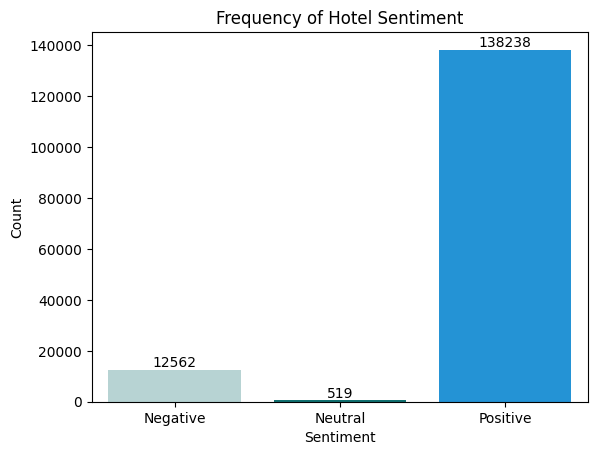

In [ ]:
#visualize sentiment data
import seaborn as sns

x = sns.countplot(x='Sentiment',
             data=HotelReview,
             palette=['#b2d8d8',"#008080", '#069AF3'])


for label in x.containers:
    x.bar_label(label)
    x.set(title='Frequency of Hotel Sentiment', ylabel='Count')

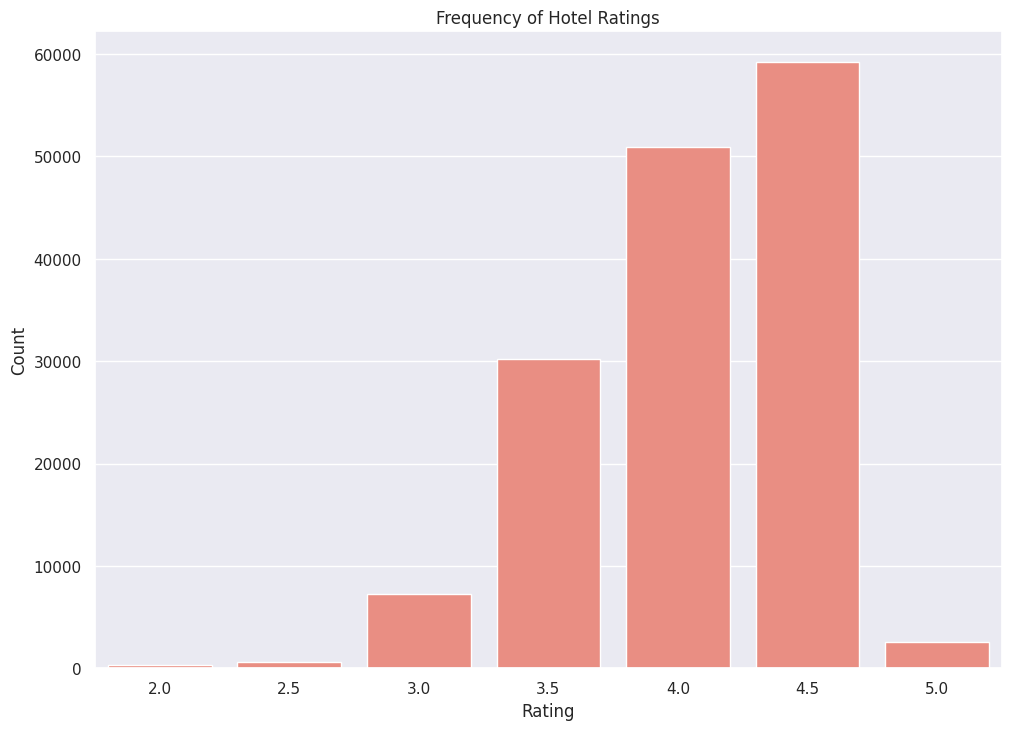

In [ ]:
#Frequency of Rating in Hotels
y = sns.countplot(x='Rating', color = 'salmon',
             data=HotelReview).set(title='Frequency of Hotel Ratings', ylabel='Count')


In [ ]:
HotelReview.groupby(['Rating'])['Hotel'].value_counts()



Rating  Hotel                                                          
2.0     The Serangoon House, a Tribute Portfolio Hotel                      352
        Lion Peak Hotel Bugis                                                 4
2.5     Arianna Hotel                                                       199
        Oxford Hotel                                                        151
        Hornbill Hotel                                                       80
        Lai Ming Hotel Cosmoland                                             59
        Aliwal Park Hotel                                                    48
        Lion Peak Hotel Raffles                                              40
        Cameron Hotel                                                        17
        Hotel 81 Fuji                                                        17
        Darlene Hotel                                                        15
        New Changi Hotel                        

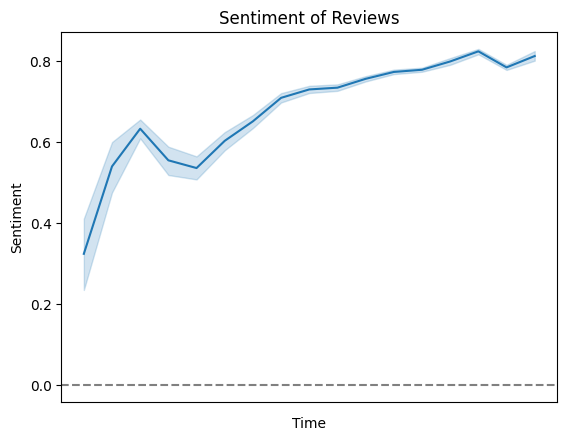

In [ ]:
# Lineplot
g = sns.lineplot(x='Year', y='Sentiment_Compound', data=HotelReview)

g.set(xticklabels=[])
g.set(title='Sentiment of Reviews')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

In [ ]:
################## Returning wordnet object corresponding to POS tag
import nltk
import string
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('omw-1.4')

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]

    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # remove stop words
    mystopwords=stopwords.words("english") + ["'s", "is", "are", "and", "a", "the","was", "an", "i", "we", "hotel"]
    text = [x for x in text if x not in mystopwords]

    # remove empty tokens
    text = [t for t in text if len(t) > 0]

    # pos tag text
    pos_tags = pos_tag(text)

    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # remove words with only one letter
    text = [t for t in text if len(t) > 1]

    # join all
    text = " ".join(text)
    return(text)

# clean text data
HotelReview["Reviews_clean"] = HotelReview["Reviews"].apply(lambda x: clean_text(x))



##################POS Tagging and Lemmatization
description_pos_tagged = [pos_tag(word_tokenize(description), tagset='universal') for description in HotelReview['Reviews_clean']]
description_pos_tagged

wnl = nltk.WordNetLemmatizer()
#wnl.lemmatize(description_pos_tagged, pos = 'n')

# if we want to get the lemmas of the content words in the text
description_nouns = []
for index, token in enumerate(description_pos_tagged):
    nouns = []
    for w, tag in token:
        if tag == 'NOUN':
            nouns.append(wnl.lemmatize(w.lower(), pos = tag[0].lower()))
    description_nouns.append(nouns)

# Flatten the nested list into a 1-dimensional list
description_nouns_flattened = []
for index, d_noun in enumerate(description_nouns):
    for noun in d_noun:
        description_nouns_flattened.append(noun)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
HotelReview.head(3)

,Hotel,Titles,Reviews,Dates,Review_Rating,Travel_Type,Hotel_Class,No_of_Reviews,Rating,Location,...,RoomService,Year,Reviews_WordCount,Sentiment_Pos,Sentiment_Neg,Sentiment_Neu,Sentiment_Compound,Sentiment,Title_preprocessed,Reviews_clean
0,Sofitel Singapore Sentosa Resort & Spa,Great place to chill!,Wonderful experience at Le Bar with fur kids! High tea was great value with free flow coffee and...,February 2023,5,couple,5.0,5565,4.5,4.5,...,1.0,2023,47,0.547,0.000,0.453,0.9912,Positive,Great Place To Chill,wonderful experience le bar fur kid high tea great value free flow coffee tea best part guest fr...
1,Sofitel Singapore Sentosa Resort & Spa,55th Birthday Celebration!,My wife and I just back from 5 days staycation. We wish to share our Appreciation to Sofitel Sen...,August 2022,5,couple,5.0,5565,4.5,4.5,...,1.0,2022,249,0.336,0.028,0.636,0.9989,Positive,55th Birthday Celebration,wife back day staycation wish share appreciation sofitel sentosa team!!!\r\n\r\ncelebrated birth...
2,Sofitel Singapore Sentosa Resort & Spa,Will definitely come back!,Super comfy bed and really great location for a peaceful getaway if you love nature :) Love that...,February 2023,4,couple,5.0,5565,4.5,4.5,...,1.0,2023,41,0.413,0.000,0.587,0.9755,Positive,Will Definitely Come Back,super comfy bed really great location peaceful getaway love nature love there’s also shortcut be...


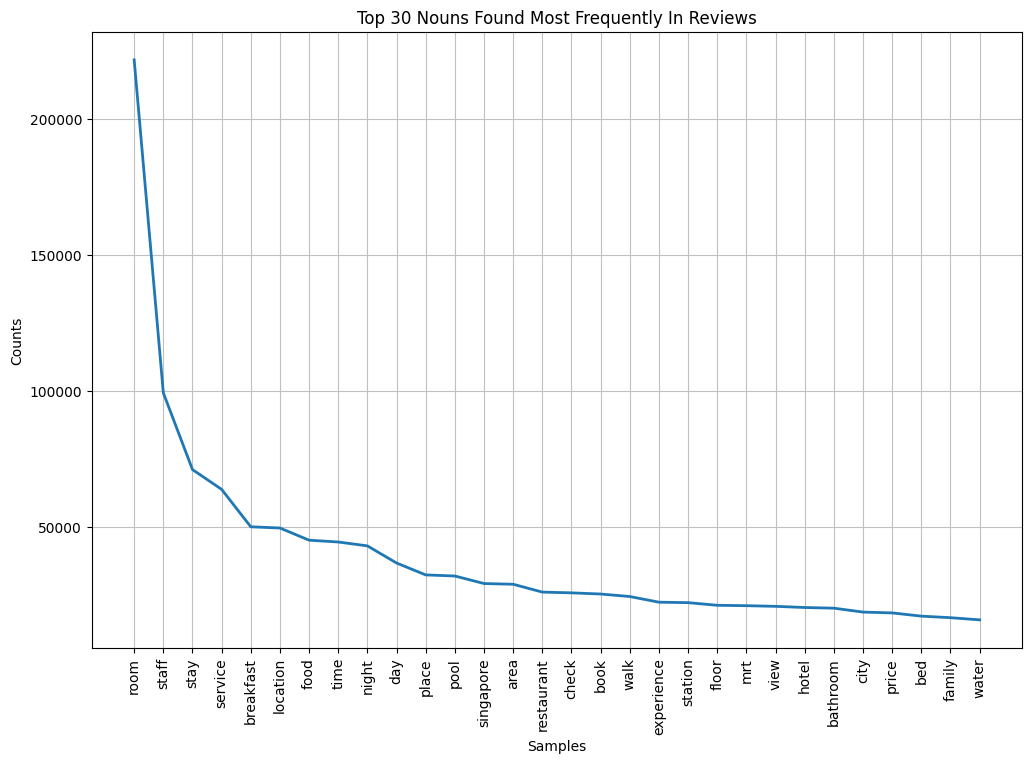

<Axes: title={'center': 'Top 30 Nouns Found Most Frequently In Reviews'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#Top 30 nouns found in Reviews

from nltk.corpus import reuters, stopwords
from nltk import FreqDist

description_nouns_freqdist = FreqDist(description_nouns_flattened)
plt.figure(figsize = (12, 8))
description_nouns_freqdist.plot(30, title = 'Top 30 Nouns Found Most Frequently In Reviews')



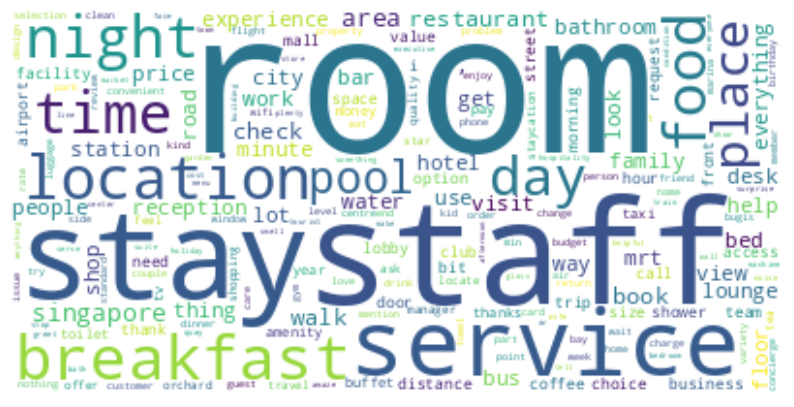

In [ ]:
#wordnet

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(description_nouns_freqdist)
plt.figure(figsize=(10, 7))

plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()


<Axes: title={'center': 'Sentiment Score'}, xlabel='Period', ylabel='Mean Sentiment Score'>

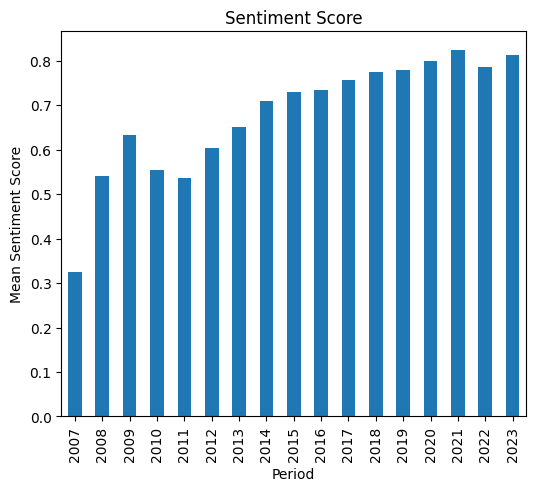

In [ ]:
#mean sentiment score by period

z = HotelReview.groupby(['Year'])['Sentiment_Compound'].mean()
#create a bar plot
z.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(6, 5))

# Wordcloud for High-tier Hotels (rated 3.5 and above)

In [ ]:
#Wordcloud for higher tier hotels

#create new df
HotelReview_5star = HotelReview.copy()
HotelReview_5star = HotelReview_5star.drop(HotelReview_5star[(HotelReview_5star.Rating != 5.0) & (HotelReview_5star.Rating != 4.5) & (HotelReview_5star.Rating != 4.0) & (HotelReview_5star.Rating != 3.5)].index)

#convert data type
HotelReview_5star[['Hotel','Titles','Reviews_clean','Dates']] = HotelReview_5star[['Hotel','Titles','Reviews_clean','Dates']].astype("string")
print(HotelReview_5star.dtypes)

Hotel                   string
Titles                  string
Reviews                 string
Dates                   string
Review_Rating         category
Travel_Type           category
Hotel_Class           category
No_of_Reviews            int64
Rating                category
Location              category
Cleanliness           category
Service               category
Value                 category
Address                 string
FreeParking           category
FreeWifi              category
FreeBreakfast         category
Gym                   category
Pool                  category
Restaurant            category
BarLounge             category
TV                    category
EventFacilities       category
RoomService           category
Year                     int64
Reviews_WordCount        int64
Sentiment_Pos          float64
Sentiment_Neg          float64
Sentiment_Neu          float64
Sentiment_Compound     float64
Sentiment             category
Title_preprocessed      object
Reviews_

In [ ]:
#143035
HotelReview_5star['Rating'].value_counts().sort_index(ascending=False)

5.0     2590
4.5    59245
4.0    50954
3.5    30246
3.0        0
2.5        0
2.0        0
Name: Rating, dtype: int64

In [ ]:
#222 hotels
HotelReview_5star.groupby(['Hotel', 'Address']).size()


Hotel                                                            Address                                                                                            
30 Bencoolen                                                     30 Bencoolen Street, Singapore 189621 Singapore                                                         500
ABC Hostel                                                       No. 3 Jalan Kubor, Singapore 199201 Singapore                                                           118
AMOY Hotel by Far East Hospitality                               76 Telok Ayer Street, Singapore 048464 Singapore                                                       1000
Amara Singapore                                                  165 Tanjong Pagar Road Amara Singapore, Singapore 088539 Singapore                                     1000
Ann Siang House                                                  28 Ann Siang Road, Singapore 069708 Singapore                                 

In [ ]:
HotelReview_5star['5star_Year'] = HotelReview_5star['Dates'].str.strip().str[-4:]

#total count is 143035
HotelReview_5star.groupby('5star_Year').size().sort_values(ascending=False) \
  .reset_index(name='Count')


,5star_Year,Count
0,2019,26924
1,2018,20741
2,2022,18576
3,2017,15180
4,2021,12947
5,2016,11303
6,2020,9178
7,2015,8691
8,2014,5508
9,2023,4670


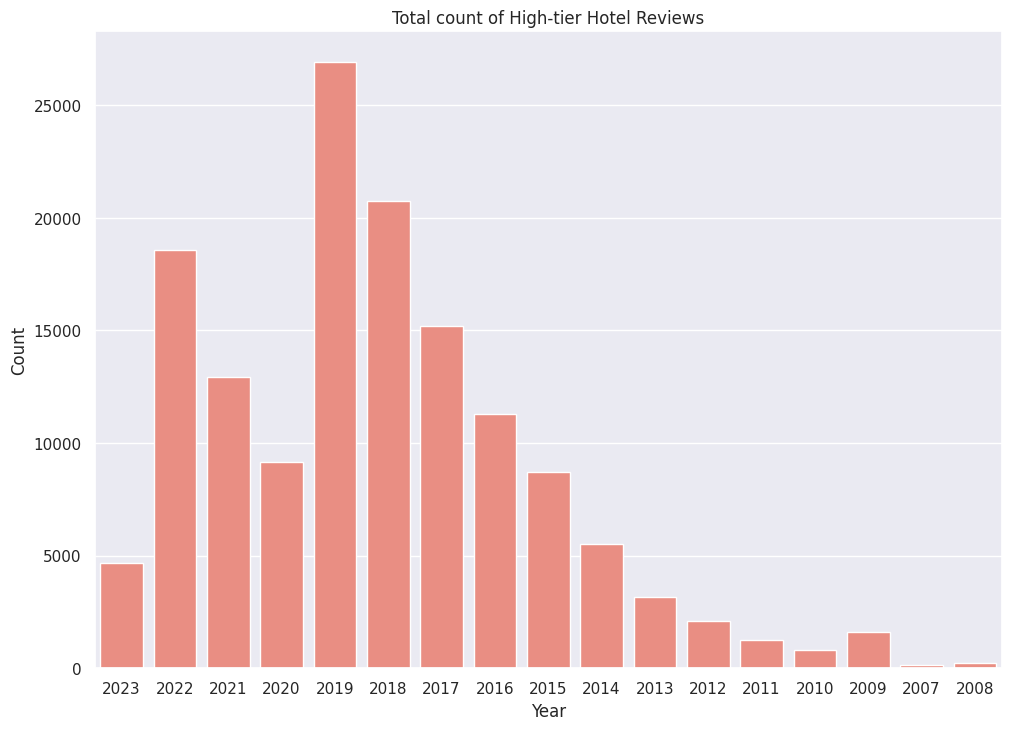

In [ ]:
#barplot for Total count of High-tier Hotel Reviews
sns.set(rc={'figure.figsize':(11.7,8.27)})

a = sns.countplot(x='5star_Year', color = 'salmon',
             data=HotelReview_5star).set(title='Total count of High-tier Hotel Reviews', ylabel='Count', xlabel='Year')


In [ ]:
HotelReview_5star['Travel_Type'].value_counts()

couple      40230
family      30792
Others      25533
business    22903
friends     12381
solo        11196
Name: Travel_Type, dtype: int64

In [ ]:
for col in HotelReview_5star.columns.drop(['Value','Hotel_Class','Rating','No_of_Reviews','Review_Rating','Titles','Reviews','Sentiment_Pos','Sentiment_Neg','Sentiment_Neu','Reviews_clean','Title_preprocessed','Sentiment_Compound']):
    print('-' * 40 + col + '-' * 40 )
    display(HotelReview_5star[col].value_counts(dropna=False).sort_index(ascending=True).head(10))

----------------------------------------Hotel----------------------------------------


30 Bencoolen                           500
ABC Hostel                             118
AMOY Hotel by Far East Hospitality    1000
Amara Singapore                       1000
Ann Siang House                        150
Aqueen Heritage Hotel Little India      50
Aqueen Hotel Paya Lebar                310
Arcadia Hotel                          100
Arton Boutique Hotel                   280
Ascott Orchard Singapore               380
Name: Hotel, dtype: Int64

----------------------------------------Dates----------------------------------------


April 2007     15
April 2008     13
April 2009     78
April 2010     51
April 2011     98
April 2012    154
April 2013    238
April 2014    425
April 2015    661
April 2016    933
Name: Dates, dtype: Int64

----------------------------------------Travel_Type----------------------------------------


Others      25533
business    22903
couple      40230
family      30792
friends     12381
solo        11196
Name: Travel_Type, dtype: int64

----------------------------------------Location----------------------------------------


2.5       30
3.0     1315
3.5    15630
4.0    29001
4.5    78477
5.0    18582
Name: Location, dtype: int64

----------------------------------------Cleanliness----------------------------------------


1.0        0
2.0        0
2.5       30
3.0      100
3.5     9915
4.0    42360
4.5    78036
5.0    12594
Name: Cleanliness, dtype: int64

----------------------------------------Service----------------------------------------


2.5       30
3.0      658
3.5    17824
4.0    50493
4.5    71630
5.0     2400
Name: Service, dtype: int64

----------------------------------------Address----------------------------------------


1 Anderson Road The Shangri-La Apartments, Singapore 259983 Singapore                340
1 Beach Road, Singapore 189673 Singapore                                            2518
1 Eng Hoon Street Hotel 81 - Osaka, Singapore 169753 Singapore                        99
1 Farrer Park Station Road Connexion, Singapore 217562 Singapore                    1000
1 Fullerton Square, Singapore 049178 Singapore                                      1000
1 Gopeng Street, Singapore 078862 Singapore                                         1000
1 Jalan Rajah Days Hotel Singapore At Zhongshan Park, Singapore 329133 Singapore     998
1 Nanson Road, Singapore 238909 Singapore                                            889
1 Netheravon Road, Singapore 508502 Singapore                                       1000
1 Onan Road Tristar Inn, Singapore 424780 Singapore                                  247
Name: Address, dtype: Int64

----------------------------------------FreeParking----------------------------------------


0.0    104018
1.0     39017
Name: FreeParking, dtype: int64

----------------------------------------FreeWifi----------------------------------------


0.0     15039
1.0    127996
Name: FreeWifi, dtype: int64

----------------------------------------FreeBreakfast----------------------------------------


0.0    127328
1.0     15707
Name: FreeBreakfast, dtype: int64

----------------------------------------Gym----------------------------------------


0.0     37532
1.0    105503
Name: Gym, dtype: int64

----------------------------------------Pool----------------------------------------


0.0     39101
1.0    103934
Name: Pool, dtype: int64

----------------------------------------Restaurant----------------------------------------


0.0     27891
1.0    115144
Name: Restaurant, dtype: int64

----------------------------------------BarLounge----------------------------------------


0.0    53763
1.0    89272
Name: BarLounge, dtype: int64

----------------------------------------TV----------------------------------------


0.0      5694
1.0    137341
Name: TV, dtype: int64

----------------------------------------EventFacilities----------------------------------------


0.0     34216
1.0    108819
Name: EventFacilities, dtype: int64

----------------------------------------RoomService----------------------------------------


0.0    46923
1.0    96112
Name: RoomService, dtype: int64

----------------------------------------Year----------------------------------------


2007      150
2008      217
2009     1611
2010      796
2011     1252
2012     2107
2013     3184
2014     5508
2015     8691
2016    11303
Name: Year, dtype: int64

----------------------------------------Reviews_WordCount----------------------------------------


1     55
5      1
6      2
7      1
8      4
9      2
10     5
11     4
12     4
13     8
Name: Reviews_WordCount, dtype: int64

----------------------------------------Sentiment----------------------------------------


Negative     10478
Neutral        464
Positive    132093
Name: Sentiment, dtype: int64

----------------------------------------5star_Year----------------------------------------


2007      150
2008      217
2009     1611
2010      796
2011     1252
2012     2107
2013     3184
2014     5508
2015     8691
2016    11303
Name: 5star_Year, dtype: Int64

In [ ]:
##################POS Tagging and Lemmatization
description_pos_tagged = [pos_tag(word_tokenize(description), tagset='universal') for description in HotelReview_5star['Reviews_clean']]
description_pos_tagged

wnl = nltk.WordNetLemmatizer()
#wnl.lemmatize(description_pos_tagged, pos = 'n')

# if we want to get the lemmas of the content words in the text
description_nouns = []
for index, token in enumerate(description_pos_tagged):
    nouns = []
    for w, tag in token:
        if tag == 'NOUN':
            nouns.append(wnl.lemmatize(w.lower(), pos = tag[0].lower()))
    description_nouns.append(nouns)

# Flatten the nested list into a 1-dimensional list
description_nouns_flattened = []
for index, d_noun in enumerate(description_nouns):
    for noun in d_noun:
        description_nouns_flattened.append(noun)


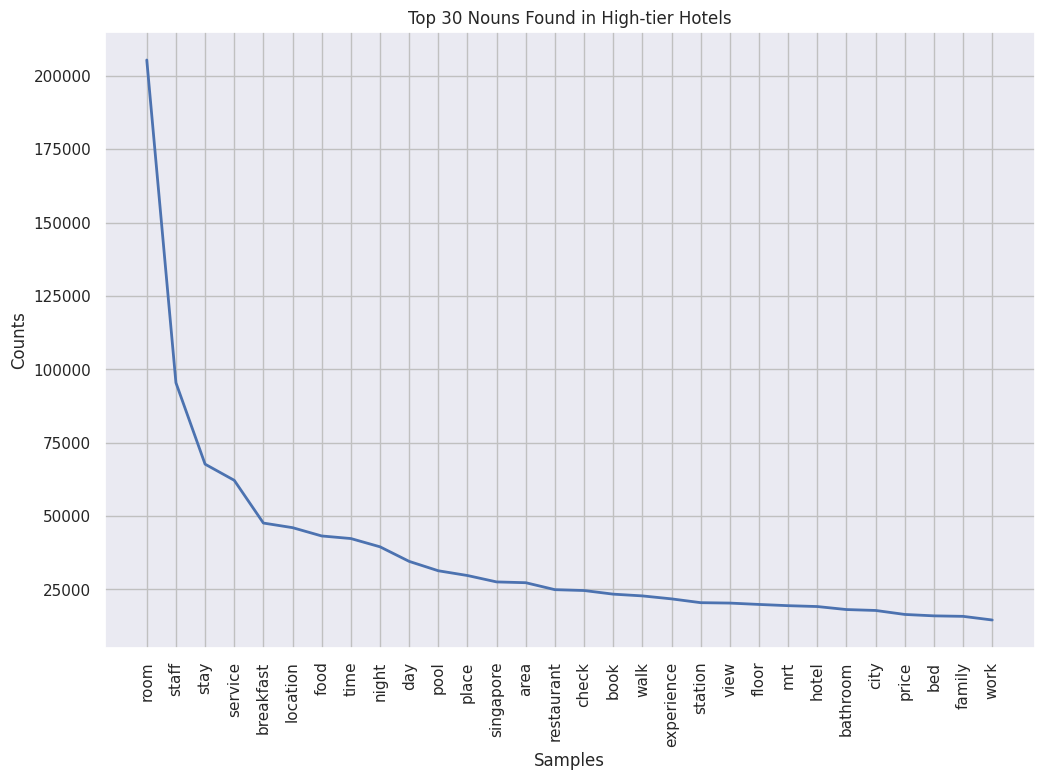

<Axes: title={'center': 'Top 30 Nouns Found in High-tier Hotels'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#Top 30 nouns found in High-tier hotel reviews

from nltk.corpus import reuters, stopwords
from nltk import FreqDist

description_nouns_freqdist = FreqDist(description_nouns_flattened)
plt.figure(figsize = (12, 8))
description_nouns_freqdist.plot(30, title = 'Top 30 Nouns Found in High-tier Hotels')

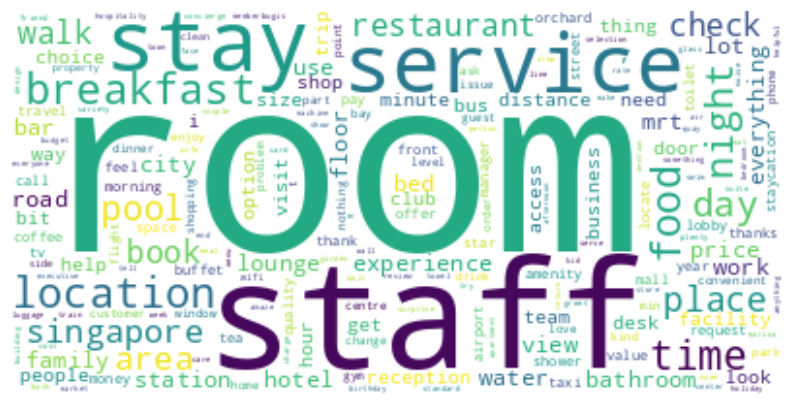

In [ ]:
#wordnet

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(description_nouns_freqdist)
plt.figure(figsize=(10, 7))

plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()



# Wordcloud for Low-tier Hotels (rated 3.0 and below)



In [ ]:
#Wordcloud for Low-tier hotels

#create new df
HotelReview_1star = HotelReview.copy()
HotelReview_1star = HotelReview_1star.drop(HotelReview_1star[(HotelReview_1star.Rating != 2.0) & (HotelReview_1star.Rating != 2.5) & (HotelReview_1star.Rating != 3.0)].index)

#convert data type
HotelReview_1star[['Hotel','Titles','Reviews_clean', 'Dates']] = HotelReview_1star[['Hotel','Titles','Reviews_clean','Dates']].astype("string")
print(HotelReview_1star.dtypes)

Hotel                   string
Titles                  string
Reviews                 string
Dates                   string
Review_Rating         category
Travel_Type           category
Hotel_Class           category
No_of_Reviews            int64
Rating                category
Location              category
Cleanliness           category
Service               category
Value                 category
Address                 string
FreeParking           category
FreeWifi              category
FreeBreakfast         category
Gym                   category
Pool                  category
Restaurant            category
BarLounge             category
TV                    category
EventFacilities       category
RoomService           category
Year                     int64
Reviews_WordCount        int64
Sentiment_Pos          float64
Sentiment_Neg          float64
Sentiment_Neu          float64
Sentiment_Compound     float64
Sentiment             category
Title_preprocessed      object
Reviews_

In [ ]:
#8284
HotelReview_1star['Rating'].value_counts().sort_index(ascending=False)

5.0       0
4.5       0
4.0       0
3.5       0
3.0    7289
2.5     639
2.0     356
Name: Rating, dtype: int64

In [ ]:
##################POS Tagging and Lemmatization
description_pos_tagged = [pos_tag(word_tokenize(description), tagset='universal') for description in HotelReview_1star['Reviews_clean']]
description_pos_tagged

wnl = nltk.WordNetLemmatizer()
#wnl.lemmatize(description_pos_tagged, pos = 'n')

# if we want to get the lemmas of the content words in the text
description_nouns = []
for index, token in enumerate(description_pos_tagged):
    nouns = []
    for w, tag in token:
        if tag == 'NOUN':
            nouns.append(wnl.lemmatize(w.lower(), pos = tag[0].lower()))
    description_nouns.append(nouns)

# Flatten the nested list into a 1-dimensional list
description_nouns_flattened = []
for index, d_noun in enumerate(description_nouns):
    for noun in d_noun:
        description_nouns_flattened.append(noun)


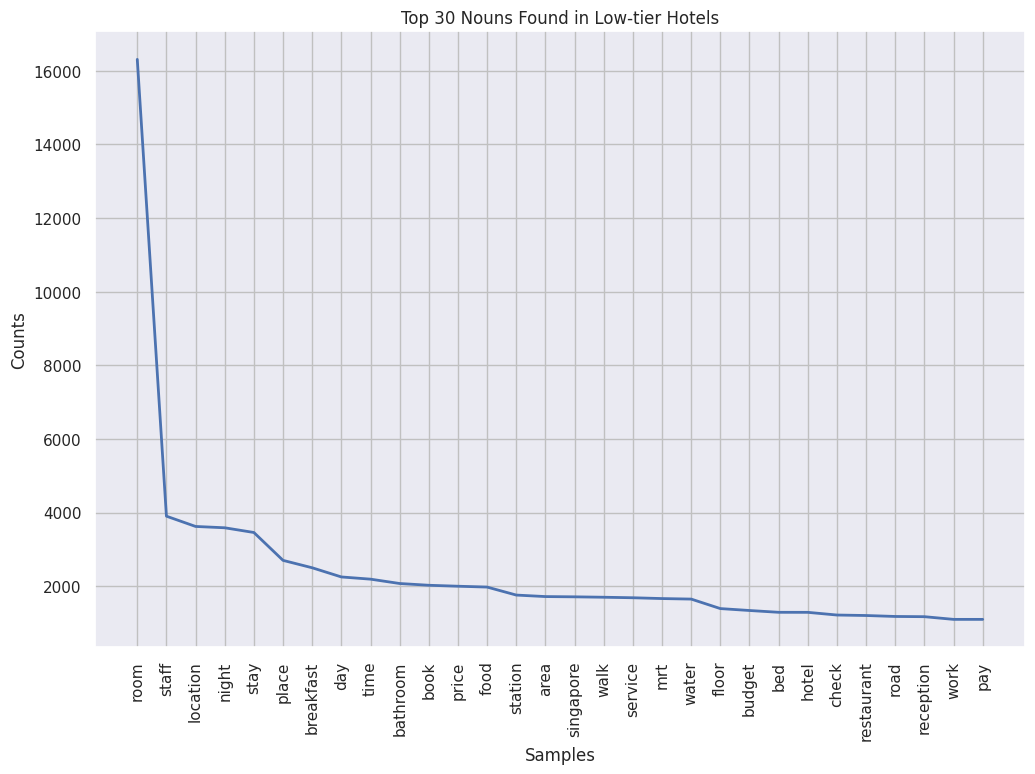

<Axes: title={'center': 'Top 30 Nouns Found in Low-tier Hotels'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#Top 30 nouns found in Low-tier hotel reviews

from nltk.corpus import reuters, stopwords
from nltk import FreqDist

description_nouns_freqdist = FreqDist(description_nouns_flattened)
plt.figure(figsize = (12, 8))
description_nouns_freqdist.plot(30, title = 'Top 30 Nouns Found in Low-tier Hotels')

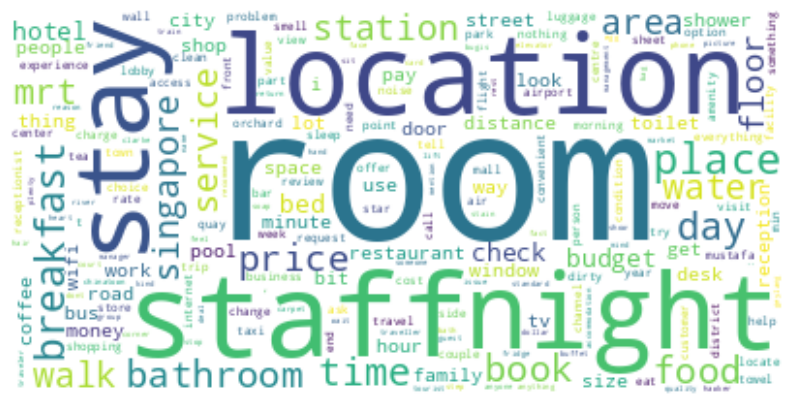

In [ ]:
#wordnet

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(description_nouns_freqdist)
plt.figure(figsize=(10, 7))

plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
#46 hotels
HotelReview_1star.groupby(['Hotel', 'Address']).size()

Hotel                                           Address                                                                                            
Aliwal Park Hotel                               77/79 Aliwal Street, Singapore 199948 Singapore                                                         48
Aloha Changi                                    30 Netheravon Road, Singapore 508522 Singapore                                                          30
Amrise Hotel                                    112 Sims Ave Geylang, Singapore 387436 Singapore                                                       158
Arianna Hotel                                   83 Syed Alwi Road Arianna Hotel Little India, Singapore 207662 Singapore                               199
Asphodel Inn Singapore                          380 Race Course Road, Singapore 218702 Singapore                                                       108
Budgetone Hotel                                 10 Lorong 18 Geylang, Singapo

In [ ]:
for col in HotelReview_1star.columns.drop(['Value','Hotel_Class','Rating','No_of_Reviews','Review_Rating','Titles','Reviews','Sentiment_Pos','Sentiment_Neg','Sentiment_Neu','Reviews_clean','Title_preprocessed','Sentiment_Compound']):
    print('-' * 40 + col + '-' * 40 )
    display(HotelReview_1star[col].value_counts(dropna=False).sort_index(ascending=True).head(10))

----------------------------------------Hotel----------------------------------------


Aliwal Park Hotel          48
Aloha Changi               30
Amrise Hotel              158
Arianna Hotel             199
Asphodel Inn Singapore    108
Budgetone Hotel             8
Butternut Tree Hotel      198
Cameron Hotel              17
Darlene Hotel              15
Fortuna Hotel             183
Name: Hotel, dtype: Int64

----------------------------------------Dates----------------------------------------


April 2007     4
April 2008    14
April 2009    32
April 2010    11
April 2011    38
April 2012    50
April 2013    38
April 2014    60
April 2015    55
April 2016    78
Name: Dates, dtype: Int64

----------------------------------------Travel_Type----------------------------------------


Others      1289
business    1037
couple      2107
family      1854
friends      950
solo        1047
Name: Travel_Type, dtype: int64

----------------------------------------Location----------------------------------------


2.5       8
3.0    1061
3.5    1684
4.0    3406
4.5    2121
5.0       4
Name: Location, dtype: int64

----------------------------------------Cleanliness----------------------------------------


1.0       4
2.0     352
2.5    1060
3.0    3646
3.5    3142
4.0      80
4.5       0
5.0       0
Name: Cleanliness, dtype: int64

----------------------------------------Service----------------------------------------


2.5    1187
3.0    3800
3.5    3249
4.0      48
4.5       0
5.0       0
Name: Service, dtype: int64

----------------------------------------Address----------------------------------------


1 Unity Street Riverside Hotel Robertson Quay, Singapore 237983 Singapore                               40
10 Lorong 18 Geylang, Singapore 398793 Singapore                                                         8
103 Beach Road Marrison Hotel, Singapore 189704 Singapore                                                4
112 Sims Ave Geylang, Singapore 387436 Singapore                                                       158
15 Kramat Road Hotel Supreme Orchard Road, Singapore 228750 Singapore                                  337
15 Merbau Road, Singapore 239032 Singapore                                                             995
161 Selegie Road, Singapore 188318 Singapore                                                           167
165 Kitchener Road Hotel 165 Farrer Park MRT, City Square Mall, Mustafa Shopping Centre, Singapo...     80
181 New Bridge Road, Singapore 059418 Singapore                                                        208
195 Serangoon Road Farrer Park, Singa

----------------------------------------FreeParking----------------------------------------


0.0    7290
1.0     994
Name: FreeParking, dtype: int64

----------------------------------------FreeWifi----------------------------------------


0.0     561
1.0    7723
Name: FreeWifi, dtype: int64

----------------------------------------FreeBreakfast----------------------------------------


0.0    5339
1.0    2945
Name: FreeBreakfast, dtype: int64

----------------------------------------Gym----------------------------------------


0.0    7069
1.0    1215
Name: Gym, dtype: int64

----------------------------------------Pool----------------------------------------


0.0    5653
1.0    2631
Name: Pool, dtype: int64

----------------------------------------Restaurant----------------------------------------


0.0    5873
1.0    2411
Name: Restaurant, dtype: int64

----------------------------------------BarLounge----------------------------------------


0.0    7418
1.0     866
Name: BarLounge, dtype: int64

----------------------------------------TV----------------------------------------


0.0    1077
1.0    7207
Name: TV, dtype: int64

----------------------------------------EventFacilities----------------------------------------


0.0    6457
1.0    1827
Name: EventFacilities, dtype: int64

----------------------------------------RoomService----------------------------------------


0.0    6544
1.0    1740
Name: RoomService, dtype: int64

----------------------------------------Year----------------------------------------


2007     136
2008     178
2009     459
2010     328
2011     584
2012     660
2013     678
2014     742
2015     925
2016    1069
Name: Year, dtype: int64

----------------------------------------Reviews_WordCount----------------------------------------


1     4
7     1
8     1
10    1
11    2
12    4
13    4
14    2
15    4
16    4
Name: Reviews_WordCount, dtype: int64

----------------------------------------Sentiment----------------------------------------


Negative    2084
Neutral       55
Positive    6145
Name: Sentiment, dtype: int64

In [ ]:
HotelReview_1star['1star_Year'] = HotelReview_1star['Dates'].str.strip().str[-4:]

#total count is 8284
HotelReview_1star.groupby('1star_Year').size().sort_values(ascending=False) \
  .reset_index(name='Count')

,1star_Year,Count
0,2016,1069
1,2015,925
2,2017,859
3,2018,747
4,2014,742
5,2013,678
6,2012,660
7,2011,584
8,2019,540
9,2009,459


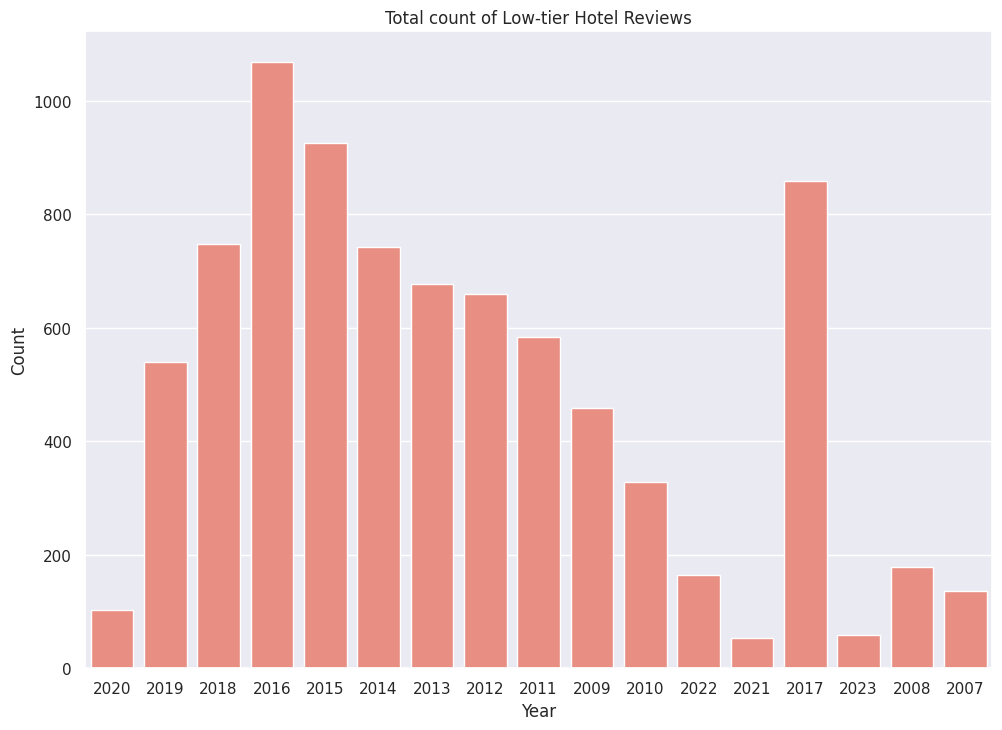

In [ ]:
#barplot for Total count of Low-tier Hotel Reviews
sns.set(rc={'figure.figsize':(11.7,8.27)})

a = sns.countplot(x='1star_Year', color = 'salmon',
             data=HotelReview_1star).set(title='Total count of Low-tier Hotel Reviews', ylabel='Count', xlabel='Year')

In [ ]:
HotelReview_1star['Travel_Type'].value_counts()

couple      2107
family      1854
Others      1289
solo        1047
business    1037
friends      950
Name: Travel_Type, dtype: int64